In [2]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Layer, Dense, Activation
from keras.initializers import RandomUniform, Initializer, Constant
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
# from keras.layers import Dense, Activation
# from keras.layers import Activation
# from keras.optimizers import RMSprop


In [3]:
!pip install -q pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 38.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have torch 1

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
PATH_TO_DB = '/content/drive/MyDrive/BMM'

Классы

In [6]:
df_th = pd.read_csv(join(PATH_TO_DB,'BD_platelets_regular.csv'), sep=';')
df_th

,r,eps,n,beta,0,0.5,1,1.5,2,2.5,...,85.5,86,86.5,87,87.5,88,88.5,89,89.5,90
0,0.5,0.1,1.3725,40,25.301178,25.209944,24.938040,24.490799,23.876934,23.108286,...,0.035687,0.040932,0.046830,0.053408,0.060684,0.068672,0.077375,0.086786,0.096886,0.107647
1,0.5,0.1,1.3725,42,25.253750,25.164614,24.898931,24.461840,23.861731,23.110008,...,0.110150,0.120814,0.131986,0.143610,0.155616,0.167922,0.180437,0.193053,0.205656,0.218120
2,0.5,0.1,1.3725,44,25.202293,25.115267,24.855852,24.428991,23.842764,23.108150,...,0.219127,0.230691,0.241920,0.252689,0.262871,0.272336,0.280954,0.288599,0.295148,0.300487
3,0.5,0.1,1.3725,46,25.143423,25.058531,24.805452,24.388945,23.816780,23.099533,...,0.305602,0.309963,0.313069,0.314847,0.315234,0.314183,0.311665,0.307667,0.302198,0.295287
4,0.5,0.1,1.3725,48,25.076042,24.993305,24.746632,24.340595,23.782681,23.083057,...,0.312300,0.304946,0.296285,0.286385,0.275334,0.263235,0.250206,0.236381,0.221905,0.206933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196139,2.1,1.0,1.3875,82,214711.812500,212251.640600,205016.031300,193427.546900,178150.890600,160037.921900,...,1.374523,1.331677,1.215894,1.043869,0.838637,0.626118,0.431531,0.276193,0.175054,0.135262
196140,2.1,1.0,1.3875,84,214710.484400,212250.328100,205014.765600,193426.375000,178149.843800,160037.015600,...,1.377804,1.336296,1.221435,1.049784,0.844330,0.631035,0.435245,0.278462,0.175858,0.134800
196141,2.1,1.0,1.3875,86,214710.375000,212250.218800,205014.671900,193426.281300,178149.765600,160036.968800,...,1.384726,1.344976,1.231294,1.060079,0.854240,0.639758,0.442089,0.282927,0.177689,0.134010
196142,2.1,1.0,1.3875,88,214711.218800,212251.046900,205015.484400,193427.046900,178150.500000,160037.640600,...,1.388198,1.349743,1.237083,1.066495,0.860799,0.645923,0.447320,0.286726,0.179647,0.133848


In [7]:
columns_to_keep = ['r', 'eps', 'n', 'beta'] + [str(column) for column in range(10, 70)]
df_th = df_th[columns_to_keep]

In [8]:
X = df_th.iloc[:, 4:]

In [9]:
y = df_th[['r', 'eps', 'n', 'beta']]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
Xvse_scaled = scaler_X.fit_transform(X)

# # Создание экземпляра MinMaxScaler для нормализации y
scaler_y = MinMaxScaler()
y_scaled= scaler_y.fit_transform(y)

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xvse_scaled , y_scaled, test_size=0.25, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, shuffle=True)

In [13]:
len(X_train)

147108

In [14]:
# Весовая функция
def weight_formula(to_weight, θ):
    return to_weight*((1/θ)*np.exp(-2*(np.log(θ/54))**2))

θ = [str(column) for column in range(10, 70)]
θ = list(map(float, θ))
vectorized = np.vectorize(weight_formula)

In [15]:
# Применение функции к массивам
X_train_weighted = np.array(vectorized(X_train, θ))
X_test_weighted = np.array(vectorized(X_test, θ))

In [16]:
from pytorch_tabnet.tab_model import TabNetRegressor

In [17]:
clf = TabNetRegressor()
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'test'],
    eval_metric=['rmsle', 'mae', 'rmse', 'mse'],
    max_epochs=50,
    patience=50,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.12544 | train_rmsle: 0.05371 | train_mae: 0.27238 | train_rmse: 0.32888 | train_mse: 0.10816 | test_rmsle: 0.05386 | test_mae: 0.27256 | test_rmse: 0.32915 | test_mse: 0.10834 |  0:00:18s
epoch 1  | loss: 0.05069 | train_rmsle: 0.03397 | train_mae: 0.20813 | train_rmse: 0.26129 | train_mse: 0.06827 | test_rmsle: 0.03405 | test_mae: 0.20835 | test_rmse: 0.26143 | test_mse: 0.06835 |  0:00:33s
epoch 2  | loss: 0.04715 | train_rmsle: 0.02222 | train_mae: 0.15424 | train_rmse: 0.21341 | train_mse: 0.04554 | test_rmsle: 0.02227 | test_mae: 0.15423 | test_rmse: 0.2134  | test_mse: 0.04554 |  0:00:52s
epoch 3  | loss: 0.04499 | train_rmsle: 0.02119 | train_mae: 0.14867 | train_rmse: 0.20753 | train_mse: 0.04307 | test_rmsle: 0.02122 | test_mae: 0.14862 | test_rmse: 0.20735 | test_mse: 0.04299 |  0:01:08s
epoch 4  | loss: 0.04278 | train_rmsle: 0.01948 | train_mae: 0.14108 | train_rmse: 0.1995  | train_mse: 0.0398  | test_rmsle: 0.0195  | test_mae: 0.14105 | test_rmse: 0.199

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [18]:
preds = clf.predict(X_test)

In [86]:
clf.weights

AttributeError: ignored

In [19]:
import timeit
start_time = timeit.default_timer()
preds = clf.predict(X_test)
time_1 = timeit.default_timer() - start_time
print("Общее время: " + str(time_1) + " мс")
print("Время на частицу: " + str(time_1/len(X_test)*1000) + " мс")

Общее время: 1.1713986849999856 мс
Время на частицу: 0.02388854484460367 мс


In [37]:
y_test_r = y_test[:, 0]
preds_r = preds[:, 0]

y_test_eps = y_test[:, 1]
preds_eps = preds[:, 1]

y_test_n = y_test[:, 2]
preds_n = preds[:, 2]

y_test_beta = y_test[:, 3]
preds_beta = preds[:, 3]

In [47]:
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error
from math import sqrt

print(
f'r2 = {r2_score(y_test, preds):.3f} MedAE = {median_absolute_error(y_test, preds):.3f}',
f'r2 = {r2_score(y_test, preds):.3f} MSE = {mean_squared_error(y_test, preds):.3f}',sep='\n')

r2 = 0.788 MedAE = 0.077
r2 = 0.788 MSE = 0.025


In [48]:
print('r')
print(
f'r2 = {r2_score(y_test_r, preds_r):.3f} MedAE = {median_absolute_error(y_test_r, preds_r):.3f}',
f'r2 = {r2_score(y_test_r, preds_r):.3f} MSE = {mean_squared_error(y_test_r, preds_r):.3f}',sep='\n')

r
r2 = 0.887 MedAE = 0.046
r2 = 0.887 MSE = 0.010


In [49]:
print('eps')
print(
f'r2 = {r2_score(y_test_eps, preds_eps):.3f} MedAE = {median_absolute_error(y_test_eps, preds_eps):.3f}',
f'r2 = {r2_score(y_test_eps, preds_eps):.3f} MSE = {mean_squared_error(y_test_eps, preds_eps):.3f}',sep='\n')

eps
r2 = 0.895 MedAE = 0.044
r2 = 0.895 MSE = 0.009


In [50]:
print('n')
print(
f'r2 = {r2_score(y_test_n, preds_n):.3f} MedAE = {median_absolute_error(y_test_n, preds_n):.3f}',
f'r2 = {r2_score(y_test_n, preds_n):.3f} MSE = {mean_squared_error(y_test_n, preds_n):.3f}',sep='\n')

n
r2 = 0.512 MedAE = 0.167
r2 = 0.512 MSE = 0.068


In [52]:
print('beta')
print(
f'r2 = {r2_score(y_test_beta, preds_beta):.3f} MedAE = {median_absolute_error(y_test_beta, preds_beta):.3f}',
f'r2 = {r2_score(y_test_beta, preds_beta):.3f} MSE = {mean_squared_error(y_test_beta, preds_beta):.3f}',sep='\n')

beta
r2 = 0.858 MedAE = 0.050
r2 = 0.858 MSE = 0.013


In [21]:
explain_matrix, masks = clf.explain(X_test)

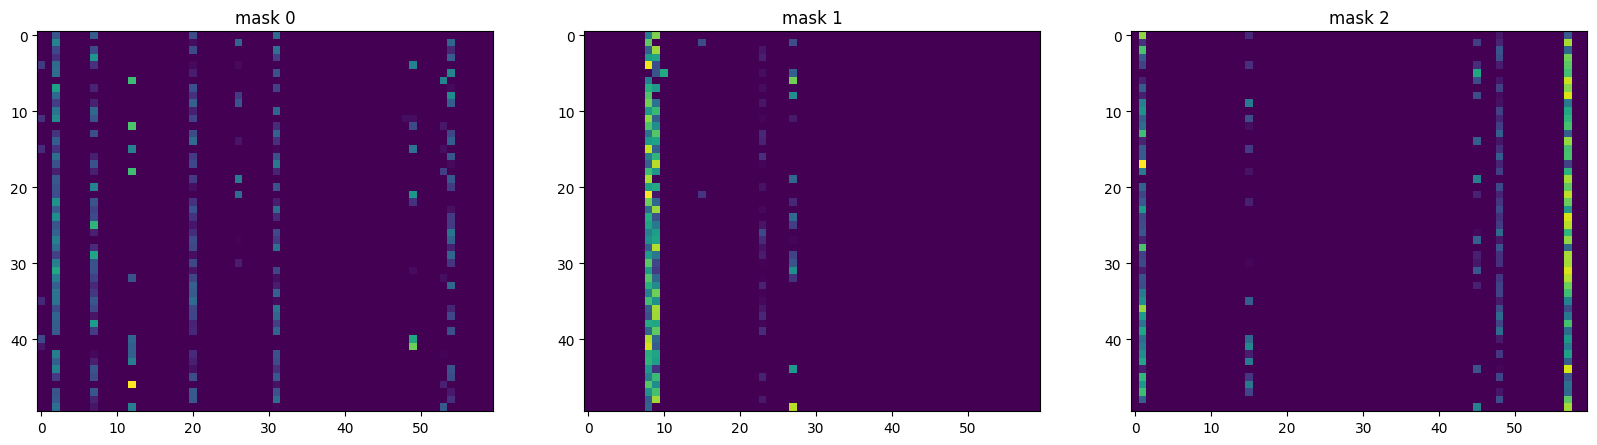

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

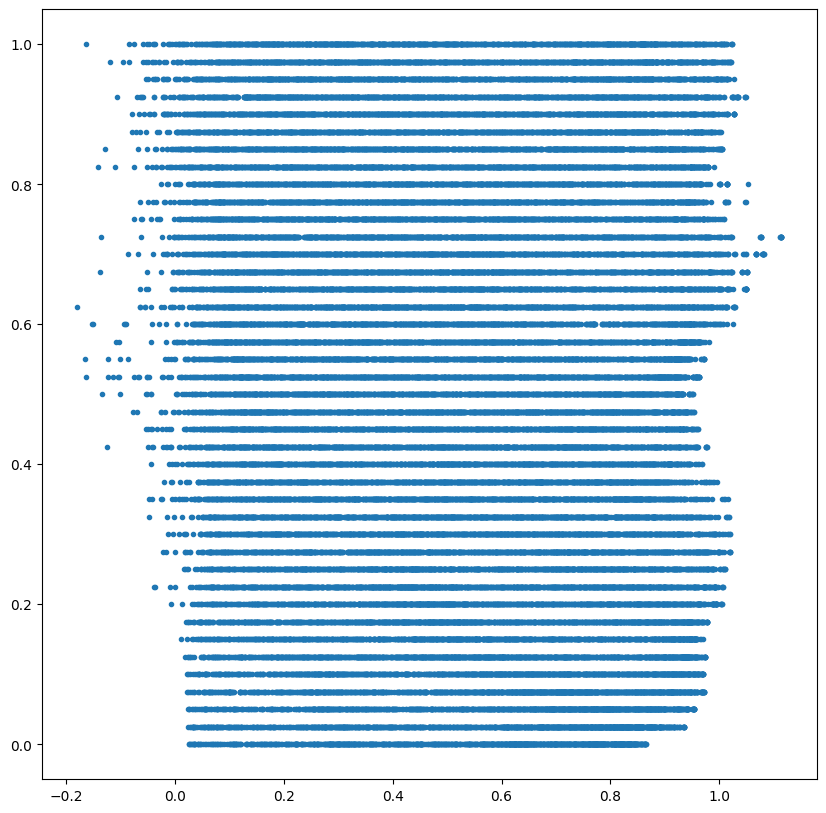

In [32]:
plt.figure(figsize=(10, 10))
plt.plot(preds[:, 1], y_test[:,0], '.')

In [81]:
def predict_regr_plot(y_test, y_pred, params, sup_title):
    N = len(params)

    plt.figure(figsize=(40, 10))
    #plt.suptitle(sup_title)
    for i in range(N):
        # for j in range(N):
            # if i == j:
            plt.subplot(1, N, i + 1)
            plt.title(str(params[i]), fontsize=30)
            plt.xlabel(str(params[i]) + ' Тестовые')
            plt.ylabel(str(params[i]) + ' Предсказанные')

            plt.plot(y_test[:, i], y_pred[:, i], '*')

                #plt.legend()
            # else:
            #     plt.subplot(N, N, i * N + j + 1)
            #     plt.title("Сравнительная карта параметров")
            #     plt.xlabel(params[i])
            #     plt.ylabel(params[j])

            #     plt.plot(y_test[:, i], y_test[:, j], '*', label="Тест")
            #     plt.plot(y_pred[:, i], y_pred[:, j], '.', label="Предсказание")
            #     plt.legend()
    plt.show()

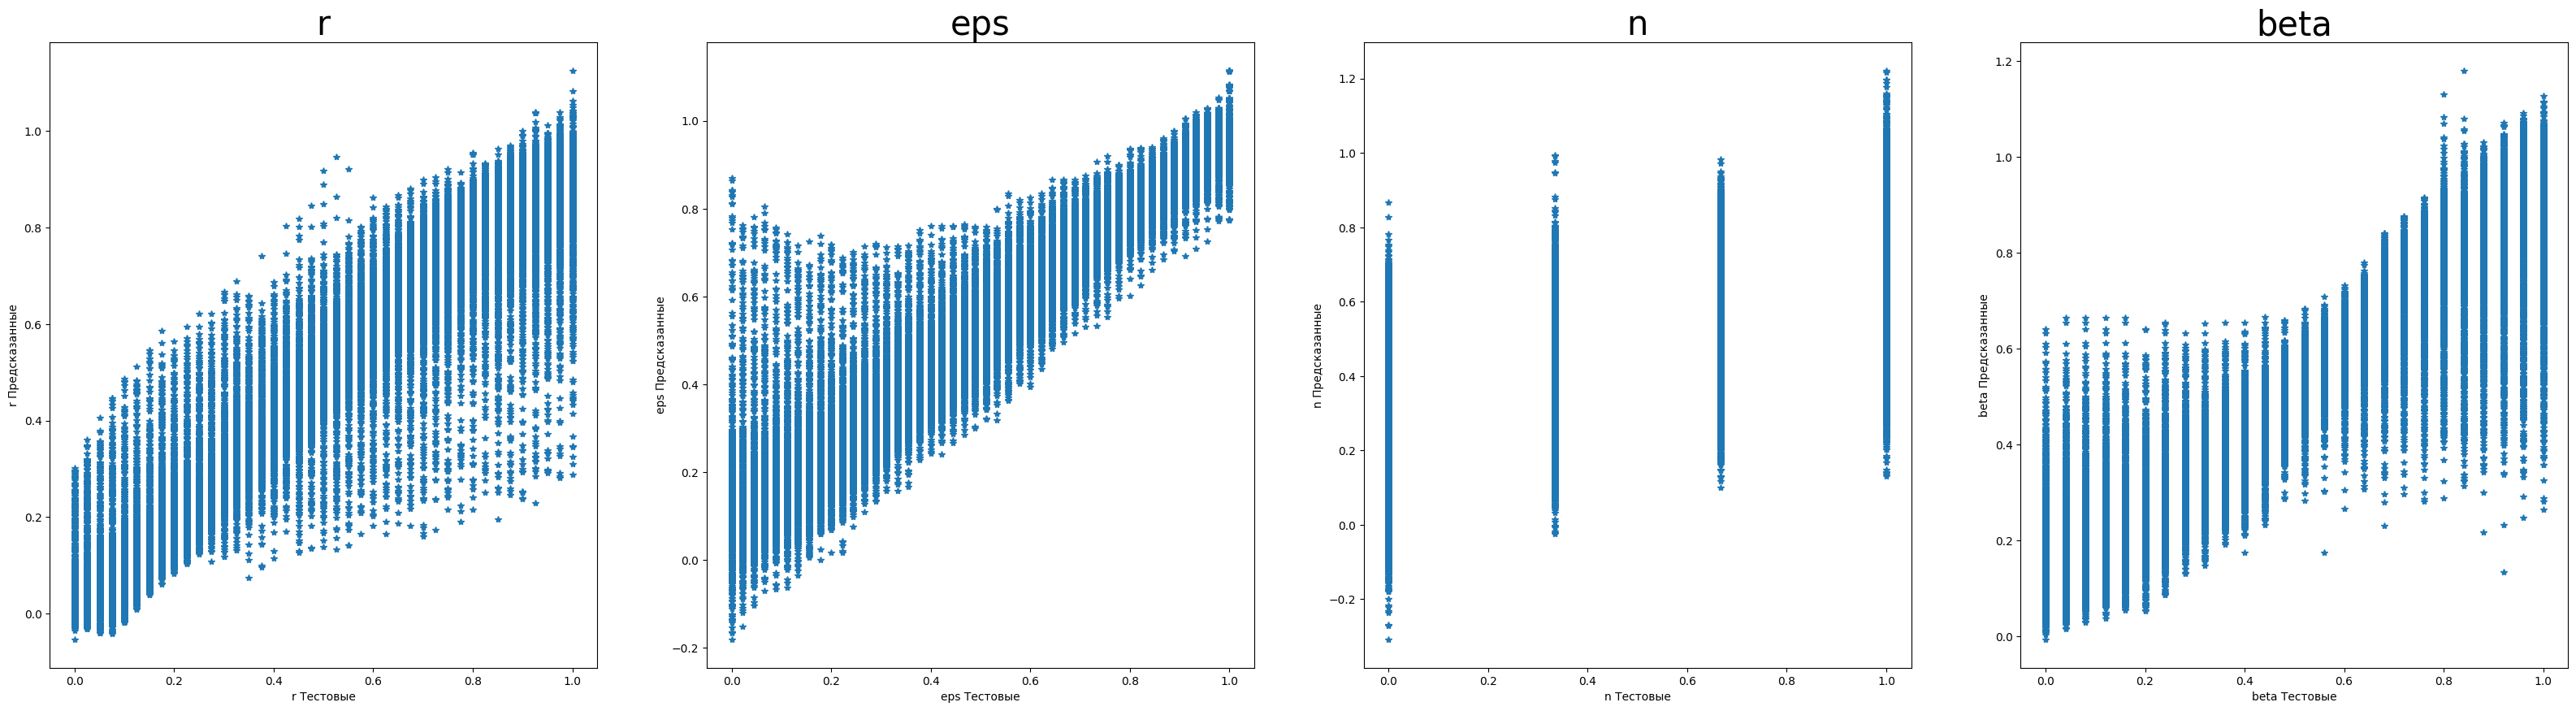

In [82]:
predict_regr_plot(y_test, preds, ['r', 'eps', 'n', 'beta'], '')

In [26]:
Y_unscaled = scaler_y.inverse_transform(y_test)
preds_unscaled = scaler_y.inverse_transform(preds)

In [27]:
len(Y_unscaled)

49036

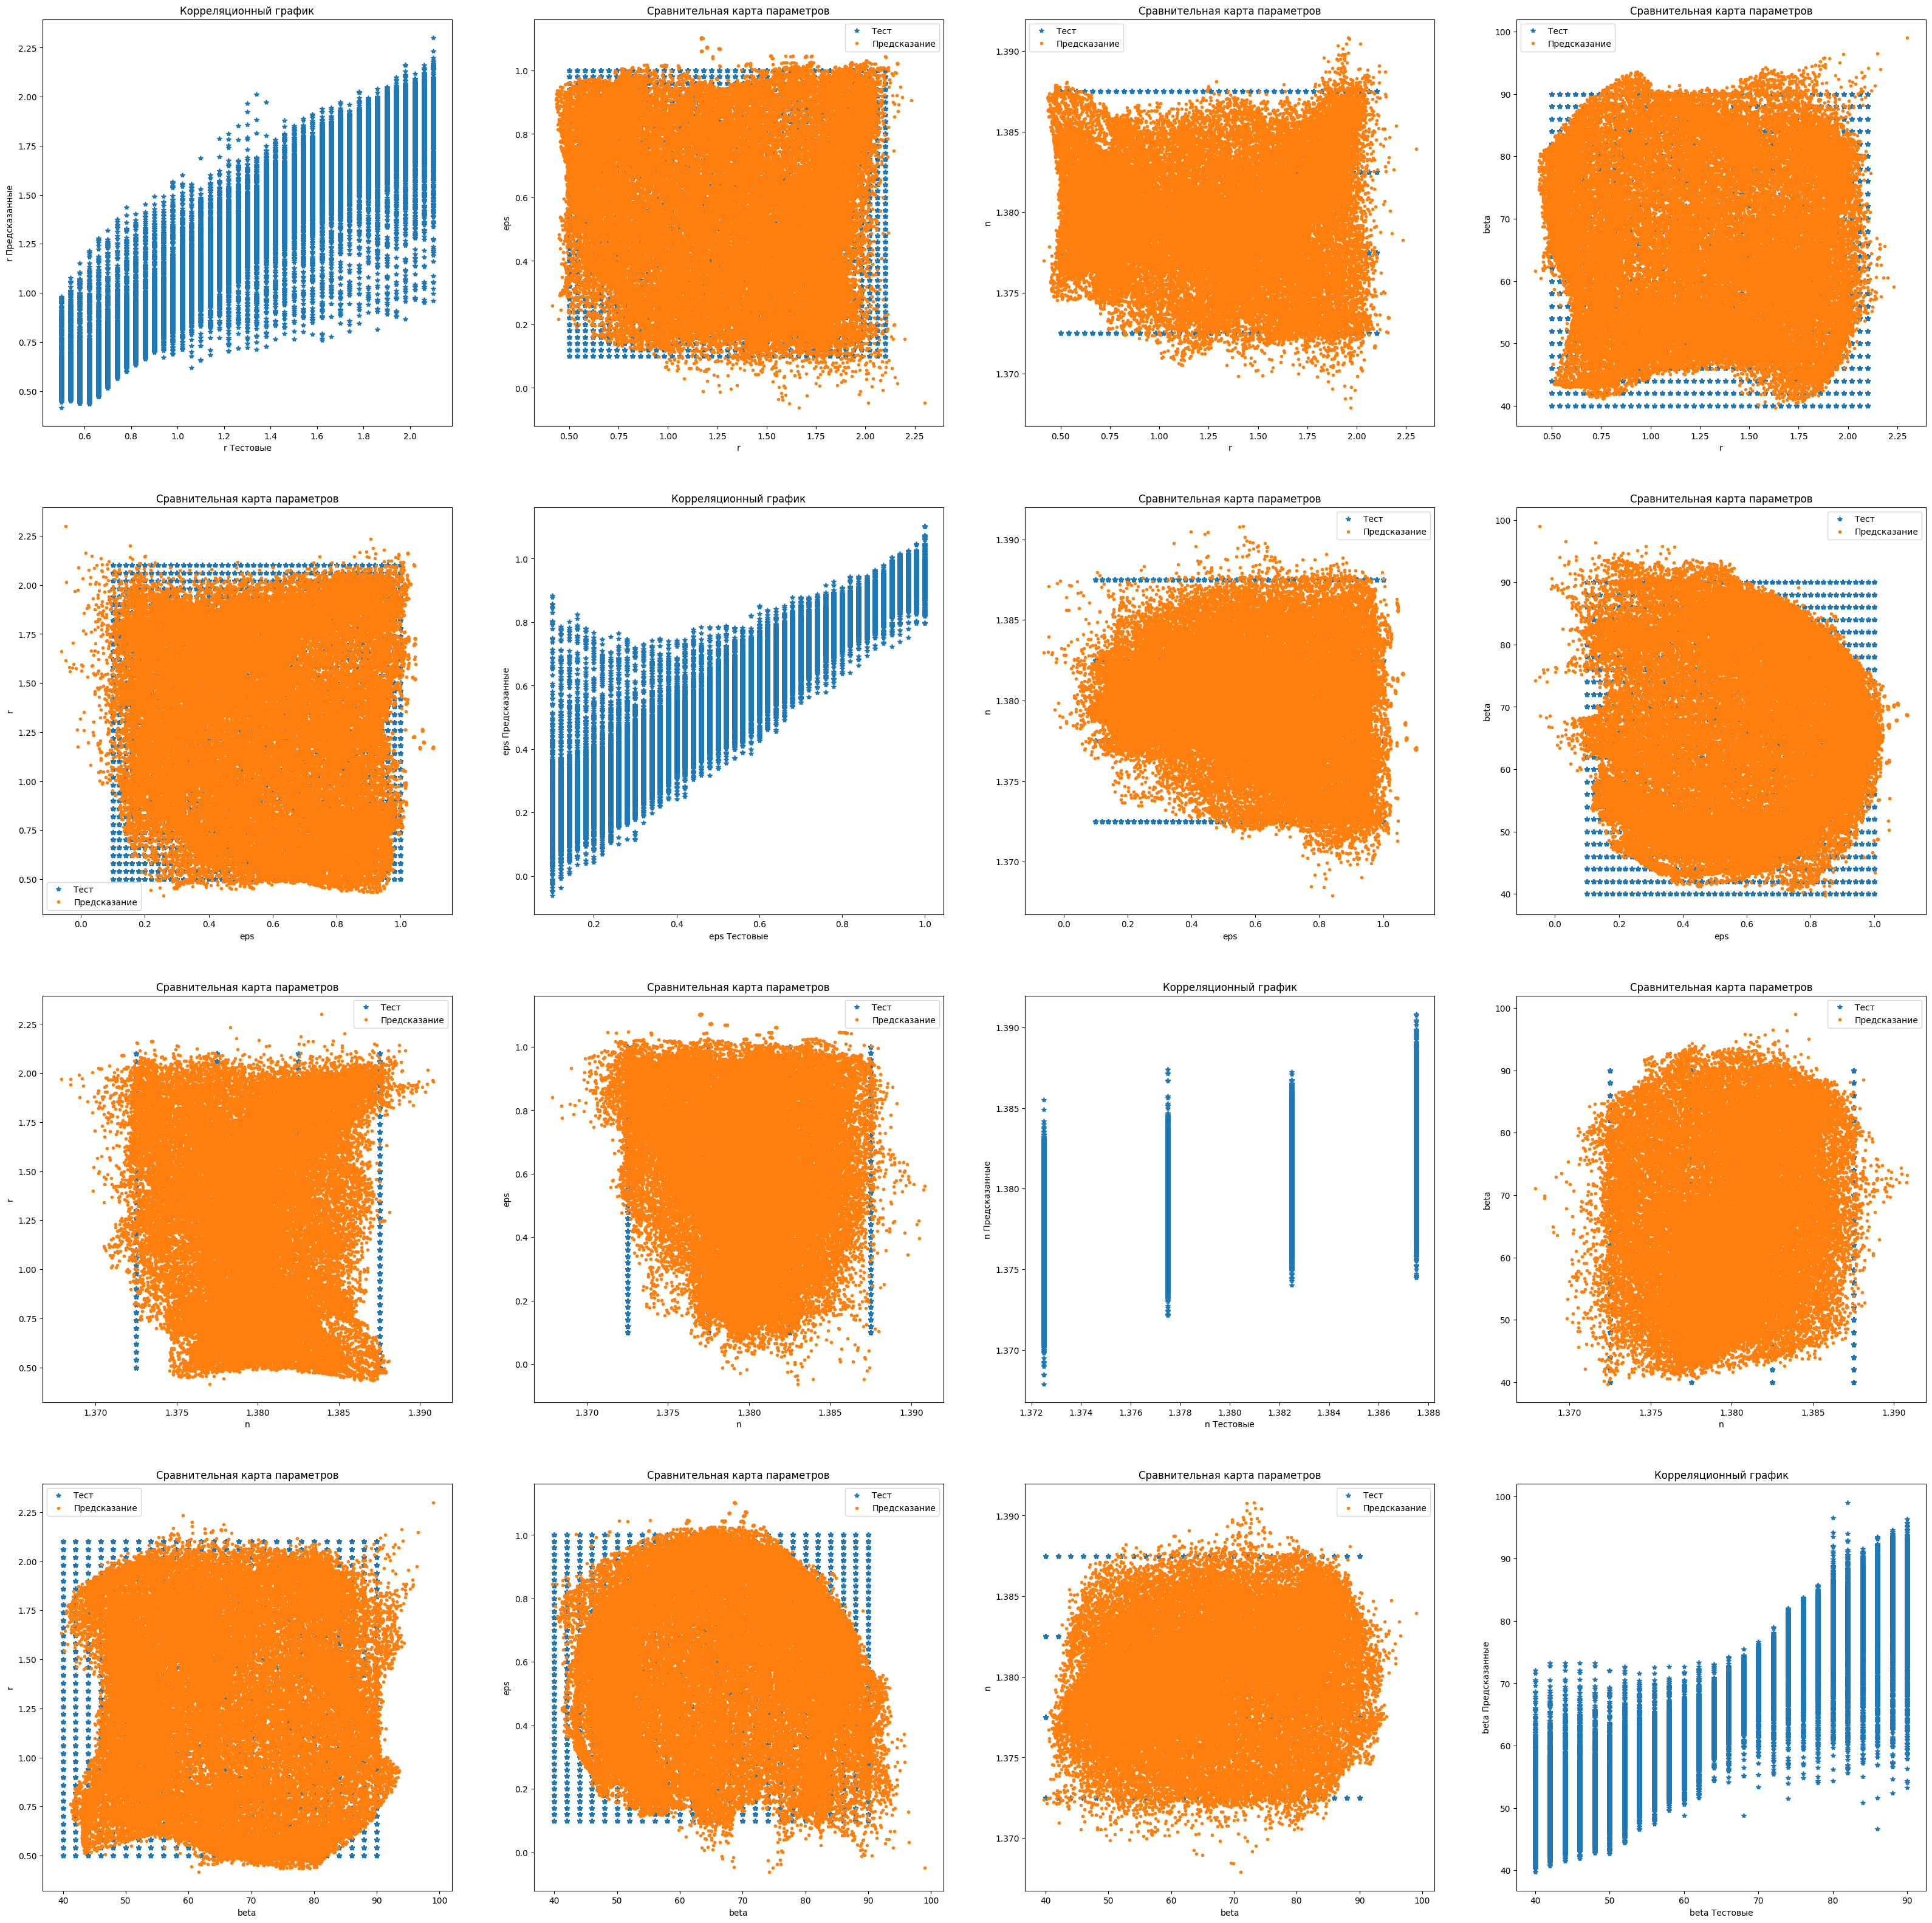

In [28]:
predict_regr_plot(Y_unscaled, preds_unscaled, ['r', 'eps', 'n', 'beta'], '')